In [4]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
%matplotlib inline

# Flattening

In [14]:
files= np.loadtxt('l1data.txt', dtype='str')
darks = np.loadtxt('darksl1.txt', dtype='str')
allimagedata = [fits.getdata(f) for f in files]
darksimages = [fits.getdata(f) for f in darks]
darksmedia = np.median(darksimages, axis=0)
flatteddatal1 = allimagedata - darksmedia

We plot an example one

<matplotlib.colorbar.Colorbar instance at 0x7ff1f054bcf8>

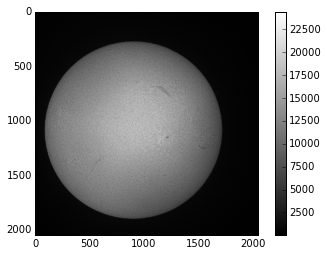

In [6]:
plt.imshow(flatteddatal1[0],cmap='gray')
plt.colorbar()

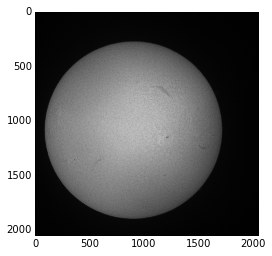

In [6]:
plt.imshow(allimagedata[0],cmap='gray')

We can make a fit file with the new flatten data. 

In [1]:
for i in range(109):
    fits.writeto(files[i]+'processed',flatteddatal1[i],header=fits.open(files[i])[0].header)

NameError: name 'fits' is not defined

<matplotlib.colorbar.Colorbar instance at 0x7ff1f029ff38>

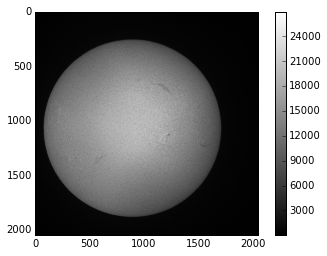

In [23]:
onefit=fits.getdata('imoa_06563_l1_20160126_12284100_b1.ftsprocessed')
headerone=fits.open('imoa_06563_l1_20160126_12284100_b1.ftsprocessed')[0].header
plt.imshow(onefit,cmap='gray')
plt.colorbar()

In [24]:
headerone

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
DATE    = '2016-01-26T12:28:46' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
FILENAME= 'imoa_06563_l1_20160126_12284100_b1.fts' / Original filename          
INSTITUT= 'OMP, OA, Pic-du-Midi' / Name of the institut                         
INSTRUME= 'CLIMSO L1'          / Name of the instrument                         
CAMERA  = 'U4000   '           / Name of the CCD camera                         
OBSERVER= 'OA-FIDUCIAL'        / Name of instrument operator                    
DATE    = '2016-01-26T12:28:41.576' / Date start of the observation UT          
DATE-OBS= '2016-01-26T12:28:

# Brillance

We create the median of all the flatted data.

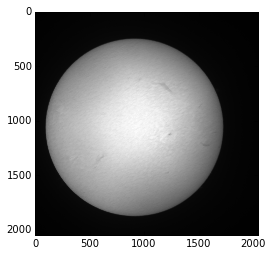

In [7]:
medianflattedl1 = np.median(flatteddatal1, axis=0)
plt.imshow(medianflattedl1,cmap='gray')

We can now mask to get only the disk of the Sun. For l1 we decide a threshold of 900 *adu*. We create the mask and put to zero all below 900. The mask looks like

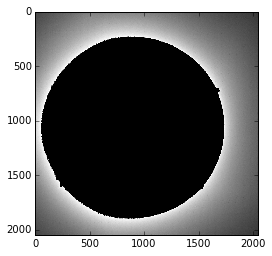

In [8]:
maskl1 = medianflattedl1 < 800 
maskedl1=(np.where(maskl1,1,0))*medianflattedl1
plt.imshow(maskedl1, cmap='gray')

The resulting masked image looks like:

In [ ]:
maskl1 = medianflattedl1 < 900 
maskedl1=(np.where(maskl1,0,1))*medianflattedl1
plt.imshow(maskedl1, cmap='gray')


Now we calculate the total of the masked image to get the luminosity of the Sun:
    

In [12]:
totall1 = np.sum(maskedl1)
print(totall1)

901708069.0


# Brillance Calibration

Above we have found the total luminosity in $H\alpha$ from the Sun disk. We know that the total luminosity of the Sun in $H\alpha$ should be 1.59 W/m/nm. With this we can calibrate each pixel.

In [22]:
call1 = 1.59/totall1
call1=call1 * flatteddatal1

We can plot one to verify:

<matplotlib.colorbar.Colorbar instance at 0x7f36ae145128>

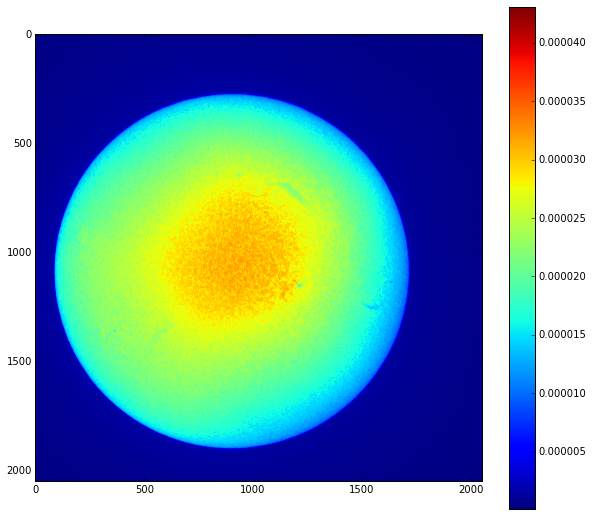

In [33]:
plt.figure(num=None, figsize=(10, 9))
plt.imshow(call1[0])
plt.colorbar()